In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [6]:
test = pd.read_csv("Data/test.csv")
train = pd.read_csv("Data/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

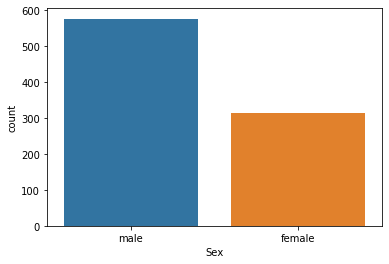

In [6]:
sns.countplot("Sex", data = train)

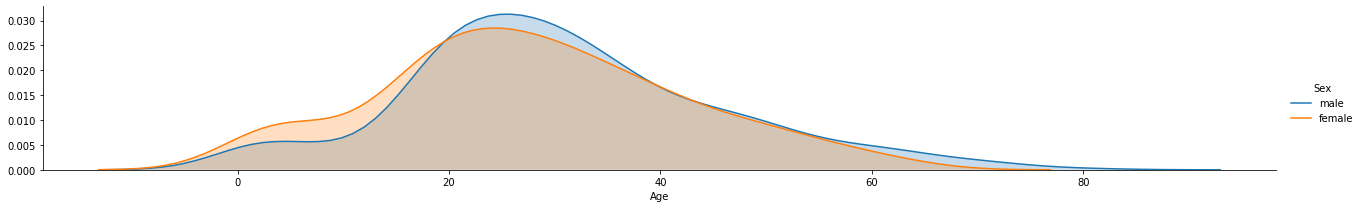

In [7]:
as_fig = sns.FacetGrid(train,hue='Sex',aspect=6)
as_fig.map(sns.kdeplot,"Age",shade=True)
as_fig.add_legend()

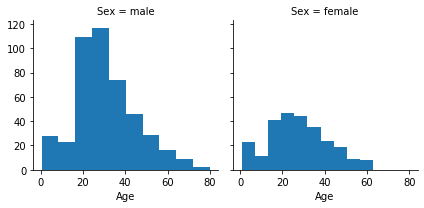

In [8]:
as_fig = sns.FacetGrid(train,col="Sex", margin_titles=True)
as_fig.map(plt.hist,"Age")

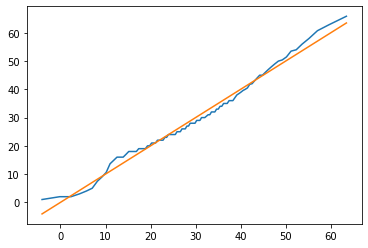

In [9]:
x = np.linspace(0.01, 0.99, 100)
theoritical = scipy.stats.norm.ppf(x,train.Age.mean(),train.Age.std())
sample = np.quantile(train.Age.dropna(),x)
plt.plot(theoritical,sample)
plt.plot(theoritical,theoritical)

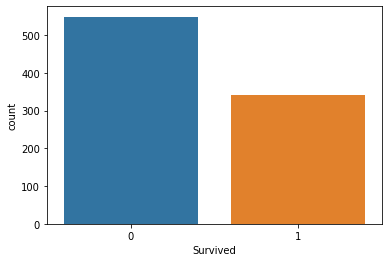

In [10]:
sns.countplot("Survived",data=train)

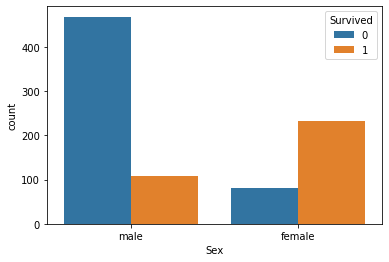

In [11]:
sns.countplot("Sex", hue = "Survived", data = train)

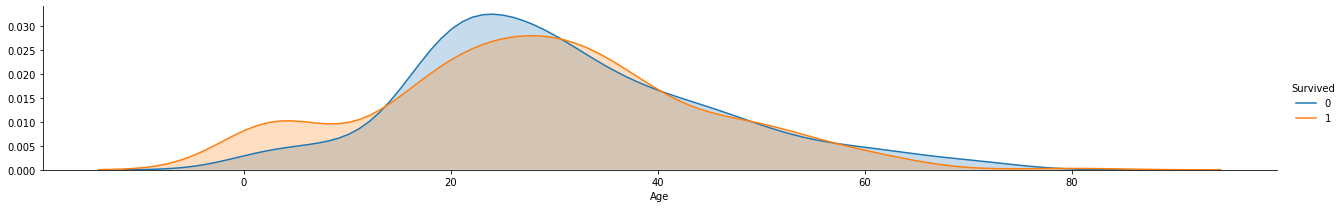

In [12]:
as_fig = sns.FacetGrid(train,hue='Survived',aspect=6)
as_fig.map(sns.kdeplot,"Age",shade=True)
as_fig.add_legend()

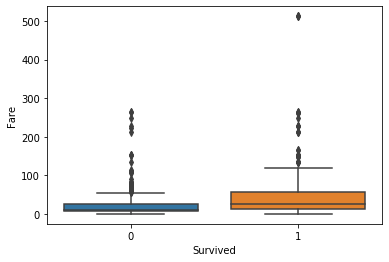

In [66]:
sns.boxplot(x="Survived",y="Fare",data=train)

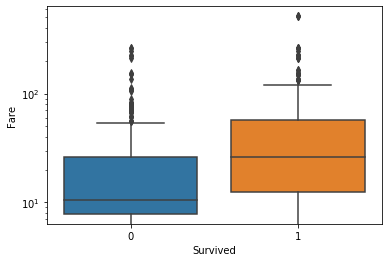

In [65]:
filter_fare = train[train.Fare != 0]
a=sns.boxplot(x="Survived",y="Fare",data=train)
a.set_yscale('log')

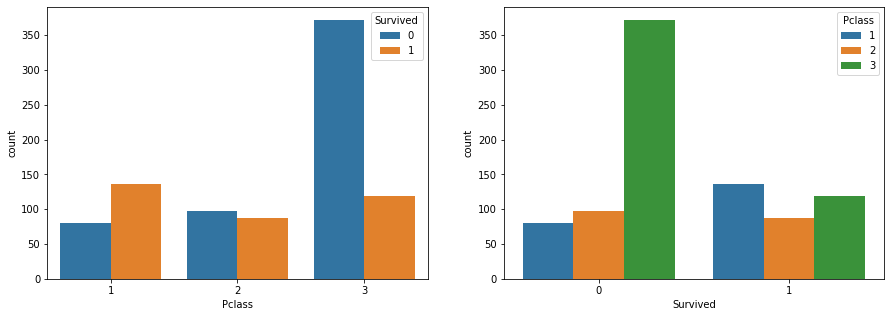

In [32]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot("Pclass",hue="Survived",data=train,ax=ax[0] )
sns.countplot("Survived",hue="Pclass",data=train,ax=ax[1])

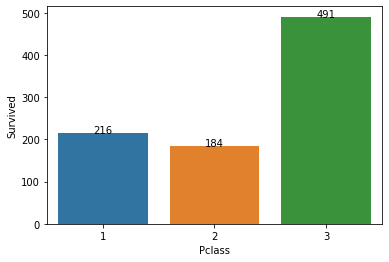

In [44]:
group_Pclass = train.groupby("Pclass").count().reset_index()
g = sns.barplot(x="Pclass",y="Survived",data=group_value)
for index,row in group_value.iterrows():
    g.text(row.name,row.Survived,round(row.Survived,2), color='black', ha="center")

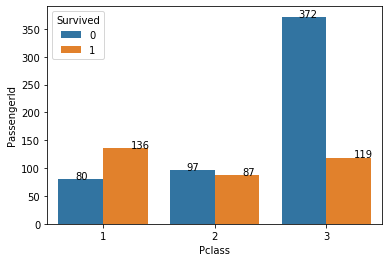

In [104]:
group_Survived_Pclass = train.groupby(["Pclass","Survived"]).count().reset_index()
g1 = sns.barplot(x="Pclass",y="PassengerId",hue="Survived",data=group_Survived_Pclass)
temp=0.25
for index,row in group_Survived_Pclass.iterrows():
    g1.text(row.name-temp,row.PassengerId,row.PassengerId )
    temp += 0.5
#g1.text(-0.25,80,80)

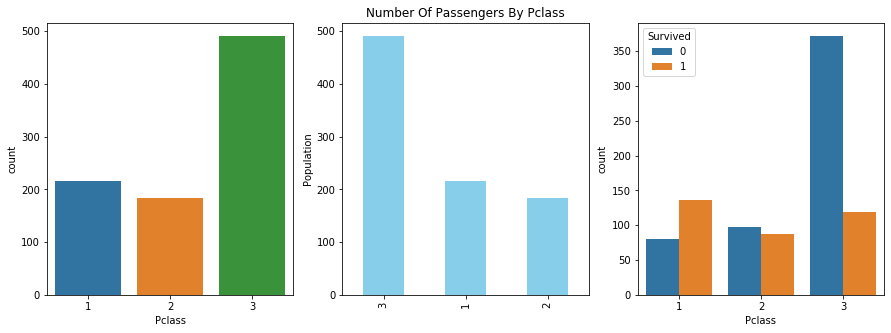

In [20]:
fig , ax = plt.subplots(1,3,figsize = (15, 5))
sns.countplot("Pclass", data = train, ax = ax[0])
ax[1].set_title("Number Of Passengers By Pclass")
ax[1].set_ylabel("Population")
train["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[1])
sns.countplot("Pclass", hue = "Survived", data = train, ax = ax[2])

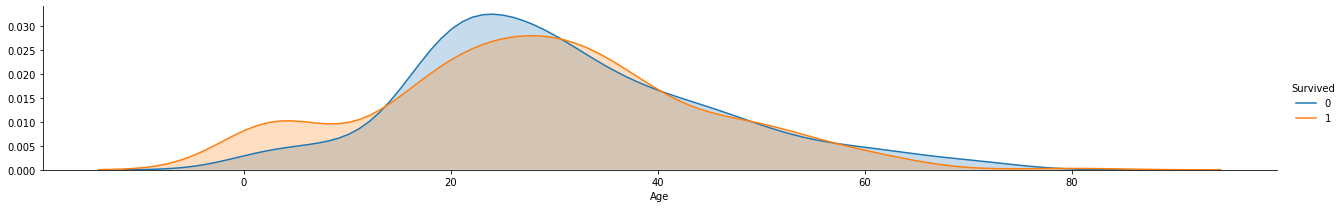

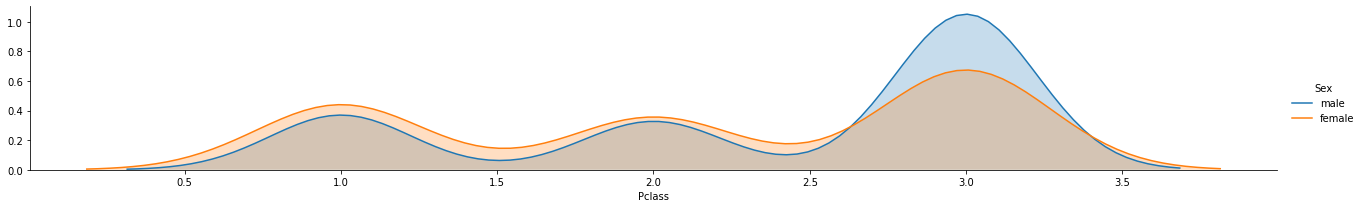

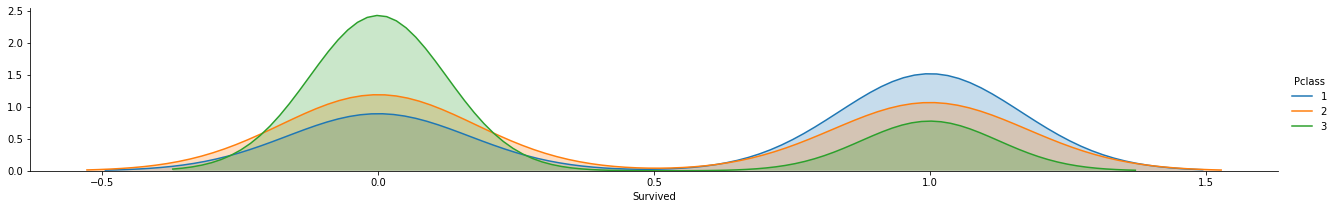

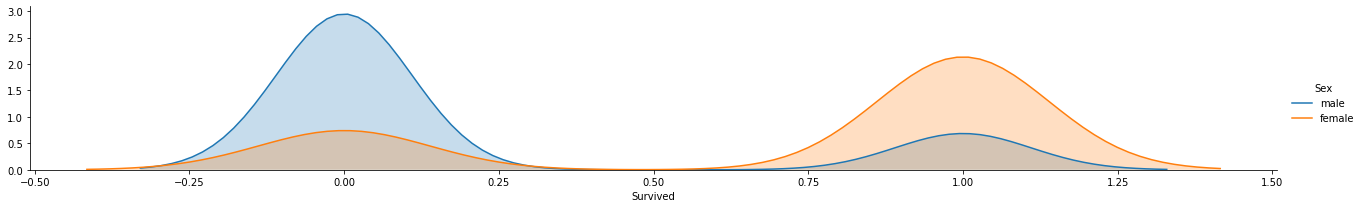

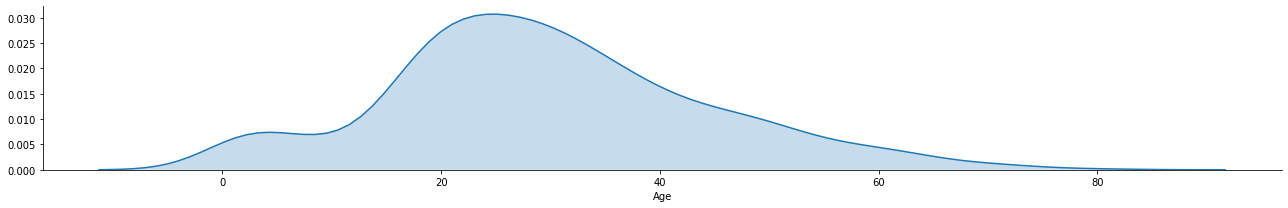

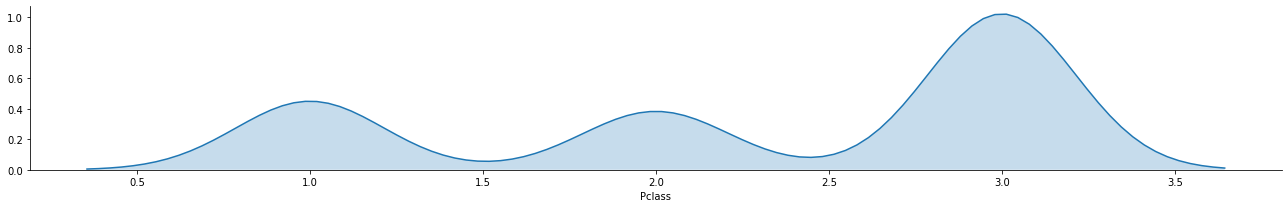

In [126]:
as_fig = sns.FacetGrid(train,hue='Survived',aspect=6)
as_fig.map(sns.kdeplot,"Age",shade=True)
as_fig.add_legend()
as_fig = sns.FacetGrid(train,hue='Sex',aspect=6)
as_fig.map(sns.kdeplot,"Pclass",shade=True)
as_fig.add_legend()
as_fig = sns.FacetGrid(train,hue='Pclass',aspect=6)
as_fig.map(sns.kdeplot,"Survived",shade=True)
as_fig.add_legend()
as_fig = sns.FacetGrid(train,hue='Sex',aspect=6)
as_fig.map(sns.kdeplot,"Survived",shade=True)
as_fig.add_legend()
as_fig = sns.FacetGrid(train,aspect=6)
as_fig.map(sns.kdeplot,"Age",shade=True)
as_fig = sns.FacetGrid(train,aspect=6)
as_fig.map(sns.kdeplot,"Pclass",shade=True)

